In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [2]:
listings_df = pd.read_csv("listings.csv")
listings_df_2 = pd.read_csv("calendar.csv")
listings_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


In [3]:
# Reduce the columns which are needed
listings_requiredcolumns = listings_df[["id","name","host_id","host_name","neighbourhood_cleansed","latitude","longitude","property_type","accommodates",
                                       "room_type","bathrooms_text","bedrooms","beds","amenities","price","availability_365",
                                        "number_of_reviews","review_scores_rating"]] 
listings_requiredcolumns

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,room_type,bathrooms_text,bedrooms,beds,amenities,price,availability_365,number_of_reviews,review_scores_rating
0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.646170,-79.424510,Entire residential home,10,Entire home/apt,3 baths,5.0,7.0,"[""Smoke alarm"", ""Dryer"", ""Indoor fireplace"", ""...",$469.00,0,7,5.00
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,Waterfront Communities-The Island,43.641050,-79.376280,Private room in rental unit,2,Private room,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Elevator"", ""Pool"", ""Gym"", ""He...",$94.00,365,169,4.84
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,Briar Hill-Belgravia,43.696020,-79.454680,Private room in residential home,3,Private room,1 shared bath,1.0,1.0,"[""Bed linens"", ""Keypad"", ""Hot water"", ""Extra p...",$72.00,365,217,4.75
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,Greenwood-Coxwell,43.668900,-79.325920,Entire rental unit,1,Entire home/apt,1 bath,NaN,1.0,"[""Bed linens"", ""Hot water kettle"", ""Hot water""...",$45.00,159,26,4.92
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,Mount Pleasant West,43.699580,-79.388140,Entire rental unit,1,Entire home/apt,1 bath,NaN,0.0,"[""Bed linens"", ""Elevator"", ""Keypad"", ""Hot wate...",$75.00,345,7,4.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,Kensington-Chinatown,43.652616,-79.399845,Entire rental unit,2,Entire home/apt,1 bath,NaN,1.0,"[""Smoke alarm"", ""Kitchen"", ""Dedicated workspac...",$71.00,62,0,NaN
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,Waterfront Communities-The Island,43.645297,-79.388957,Entire condominium (condo),2,Entire home/apt,1 bath,1.0,1.0,"[""Bed linens"", ""Hot water kettle"", ""Elevator"",...",$109.00,151,0,NaN
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,Dovercourt-Wallace Emerson-Junction,43.664231,-79.442823,Entire residential home,4,Entire home/apt,1 bath,2.0,2.0,"[""Smoke alarm"", ""Private entrance"", ""Kitchen"",...",$106.00,89,0,NaN
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,Waterfront Communities-The Island,43.643826,-79.379908,Entire condominium (condo),5,Entire home/apt,2 baths,2.0,3.0,"[""Bed linens"", ""Hot water kettle"", ""Elevator"",...",$263.00,88,0,NaN


# Data Cleaning

In [4]:
#Checking to see if all columns has correct datatype
listings_requiredcolumns.dtypes

id                          int64
name                       object
host_id                     int64
host_name                  object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
accommodates                int64
room_type                  object
bathrooms_text             object
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
availability_365            int64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [5]:
#checking the null values in Dataset
listings_requiredcolumns.isnull()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,room_type,bathrooms_text,bedrooms,beds,amenities,price,availability_365,number_of_reviews,review_scores_rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
15080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
15081,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
15082,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [6]:
# looking for missing values
listings_requiredcolumns.count()

id                        15084
name                      15083
host_id                   15084
host_name                 15077
neighbourhood_cleansed    15084
latitude                  15084
longitude                 15084
property_type             15084
accommodates              15084
room_type                 15084
bathrooms_text            15071
bedrooms                  13945
beds                      14873
amenities                 15084
price                     15084
availability_365          15084
number_of_reviews         15084
review_scores_rating      11609
dtype: int64

In [7]:
# Dropping the null rows
Airbnb_listings_df = listings_requiredcolumns.dropna(how ='any')
Airbnb_listings_df.count()

id                        10687
name                      10687
host_id                   10687
host_name                 10687
neighbourhood_cleansed    10687
latitude                  10687
longitude                 10687
property_type             10687
accommodates              10687
room_type                 10687
bathrooms_text            10687
bedrooms                  10687
beds                      10687
amenities                 10687
price                     10687
availability_365          10687
number_of_reviews         10687
review_scores_rating      10687
dtype: int64

In [8]:
#Checking to see there should be no duplicate data
Airbnb_listings_df.duplicated()

0        False
1        False
2        False
5        False
6        False
         ...  
14934    False
14947    False
14960    False
14963    False
14994    False
Length: 10687, dtype: bool

In [9]:
#Renaming the columns
Airbnb_listings_final_df = Airbnb_listings_df.rename(columns={"id":"listing_id",
                                                              "neighbourhood_cleansed":"neighbourhood",
                                                              "name":"property_name"})
Airbnb_listings_final_df 

,listing_id,property_name,host_id,host_name,neighbourhood,latitude,longitude,property_type,accommodates,room_type,bathrooms_text,bedrooms,beds,amenities,price,availability_365,number_of_reviews,review_scores_rating
0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64617,-79.42451,Entire residential home,10,Entire home/apt,3 baths,5.0,7.0,"[""Smoke alarm"", ""Dryer"", ""Indoor fireplace"", ""...",$469.00,0,7,5.00
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,Waterfront Communities-The Island,43.64105,-79.37628,Private room in rental unit,2,Private room,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Elevator"", ""Pool"", ""Gym"", ""He...",$94.00,365,169,4.84
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,Briar Hill-Belgravia,43.69602,-79.45468,Private room in residential home,3,Private room,1 shared bath,1.0,1.0,"[""Bed linens"", ""Keypad"", ""Hot water"", ""Extra p...",$72.00,365,217,4.75
5,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,Waterfront Communities-The Island,43.64151,-79.37643,Entire rental unit,2,Entire home/apt,1.5 baths,1.0,2.0,"[""Smoke alarm"", ""Elevator"", ""Pool"", ""Gym"", ""Ki...",$125.00,365,1,5.00
6,40456,Downtown- King Size Bed and Parking,174063,Denis,South Parkdale,43.63532,-79.44049,Entire residential home,5,Entire home/apt,1 bath,2.0,2.0,"[""Hot water"", ""Coffee maker"", ""Heating"", ""Oven...",$100.00,190,113,4.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14934,51285467,1 room/2 bed unit near the lake in Old Toronto,68920217,Jacob,Long Branch,43.59077,-79.53081,Entire rental unit,4,Entire home/apt,1 bath,1.0,2.0,"[""Long term stays allowed""]",$165.00,365,1,2.00
14947,51306728,1-Bedroom Condo in the Heart of Downtown Toronto,14248365,Jay,Waterfront Communities-The Island,43.64461,-79.39189,Entire condominium (condo),2,Entire home/apt,1 bath,1.0,0.0,"[""Smoke alarm"", ""Pool"", ""Pool table"", ""Kitchen...",$200.00,353,1,5.00
14960,51325342,Cottage feel in the heart of the city,152725249,Aina,Broadview North,43.68493,-79.35119,Private room in residential home,1,Private room,1 shared bath,1.0,1.0,"[""Bed linens"", ""Hot water kettle"", ""Hot water""...",$47.00,0,2,5.00
14963,51331254,Cottage in the City - breakfast Included!,244309863,Chamalee,Parkwoods-Donalda,43.76491,-79.32371,Entire guest suite,6,Entire home/apt,1 bath,1.0,2.0,"[""Bed linens"", ""Hot water kettle"", ""Hot water""...",$95.00,357,2,5.00


In [10]:
Airbnb_listings_df['price']

0        $469.00
1         $94.00
2         $72.00
5        $125.00
6        $100.00
          ...   
14934    $165.00
14947    $200.00
14960     $47.00
14963     $95.00
14994    $194.00
Name: price, Length: 10687, dtype: object

In [11]:
Airbnb_listings_final_df = Airbnb_listings_df[Airbnb_listings_df['price'].notnull()].copy()
Airbnb_listings_final_df['price'] = Airbnb_listings_final_df['price'].apply(str).str.replace(',', '' , regex = True).apply(str).str.replace('$', '' , regex = True).astype(float)

# DATA VISUALIZATIONS

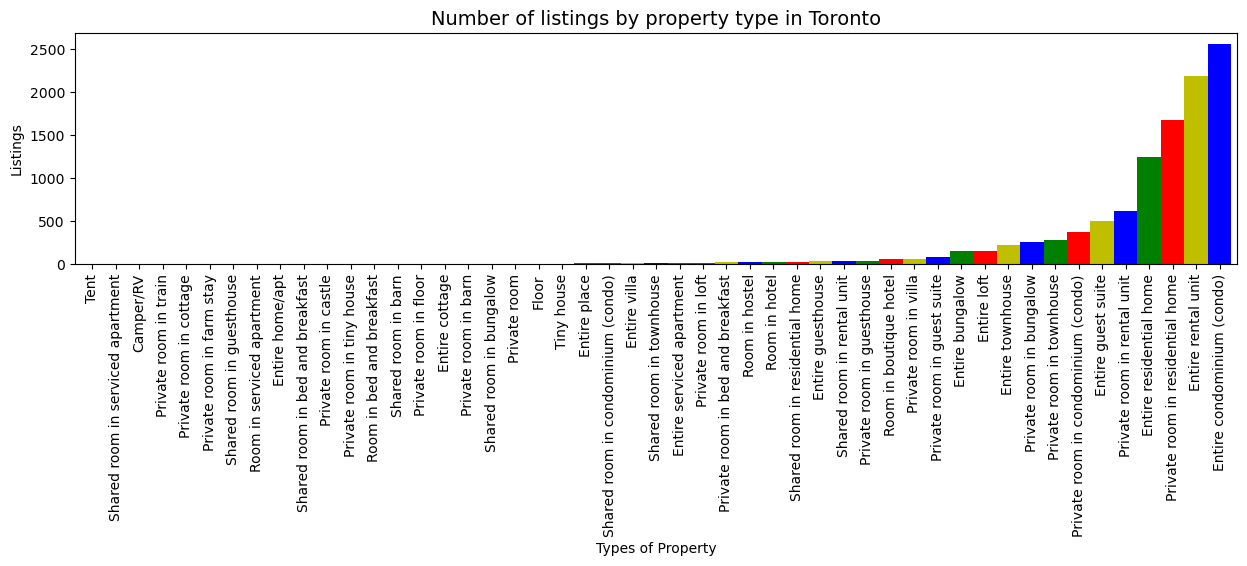

In [12]:
# Q1 Types of properties available
type_prop = Airbnb_listings_df['property_type'].value_counts().sort_values(ascending=True)
type_prop.plot.bar(figsize =(15,3), width=1, color=['b','g','r','y'])
                                            
plt.xlabel("Types of Property")
plt.ylabel("Listings")
plt.title("Number of listings by property type in Toronto", fontsize=14)

plt.show()

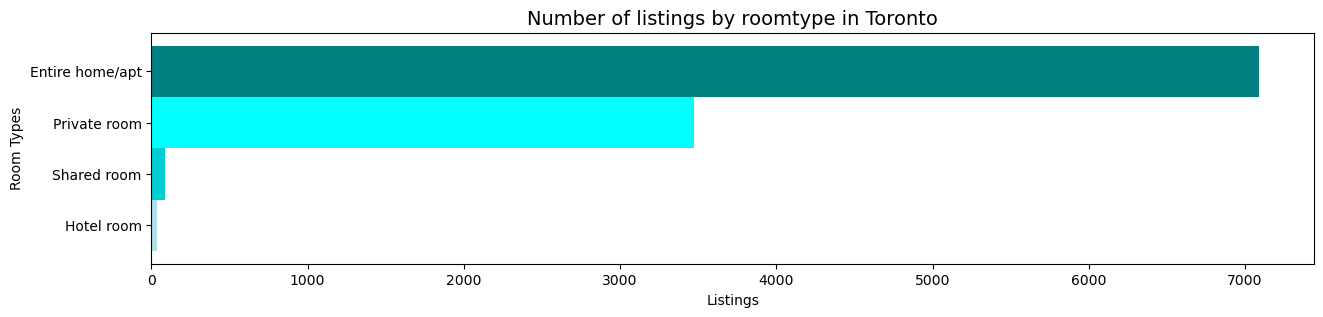

In [13]:
# Q1 Types of room types available
type_prop = Airbnb_listings_df['room_type'].value_counts().sort_values(ascending=True)
type_prop.plot.barh(figsize =(15,3), width=1, color=['powderblue','darkturquoise','aqua','teal'])
                                         
plt.ylabel("Room Types")
plt.xlabel("Listings")
plt.title("Number of listings by roomtype in Toronto", fontsize=14)
plt.show()


In [14]:
# Average rental Price per month

listing_calendar = pd.read_csv("calendar.csv")
listing_calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,732562,2021-08-07,f,$98.00,$98.00,30.0,1125.0
1,224775,2021-08-06,f,$80.00,$80.00,28.0,162.0
2,224775,2021-08-07,f,$80.00,$80.00,28.0,162.0
3,224775,2021-08-08,f,$80.00,$80.00,28.0,162.0
4,224775,2021-08-09,f,$80.00,$80.00,28.0,162.0
5,224775,2021-08-10,f,$80.00,$80.00,28.0,162.0
6,224775,2021-08-11,f,$80.00,$80.00,28.0,162.0
7,224775,2021-08-12,f,$80.00,$80.00,28.0,162.0
8,224775,2021-08-13,f,$80.00,$80.00,28.0,162.0
9,224775,2021-08-14,f,$80.00,$80.00,28.0,162.0


In [15]:
listings_calendarcolumns = listing_calendar[["listing_id","date","price","minimum_nights","maximum_nights"]] 
listings_calendarcolumns

,listing_id,date,price,minimum_nights,maximum_nights
0,732562,2021-08-07,$98.00,30.0,1125.0
1,224775,2021-08-06,$80.00,28.0,162.0
2,224775,2021-08-07,$80.00,28.0,162.0
3,224775,2021-08-08,$80.00,28.0,162.0
4,224775,2021-08-09,$80.00,28.0,162.0
...,...,...,...,...,...
5505679,51432347,2022-08-01,$400.00,3.0,1125.0
5505680,51432347,2022-08-02,$400.00,3.0,1125.0
5505681,51432347,2022-08-03,$400.00,3.0,1125.0
5505682,51432347,2022-08-04,$400.00,3.0,1125.0


In [16]:
listings_calendarcolumns = listings_calendarcolumns[listings_calendarcolumns['price'].notnull()].copy()
listings_calendarcolumns['price'] = listings_calendarcolumns['price'].apply(str).str.replace(',', '' , regex = True).apply(str).str.replace('$', '' , regex = True).astype(float)
listings_calendarcolumns.dtypes

listing_id          int64
date               object
price             float64
minimum_nights    float64
maximum_nights    float64
dtype: object

In [17]:
df_calendar = listings_calendarcolumns.groupby('date')[["price"]].mean()
df_calendar['mean'] = listings_calendarcolumns.groupby('date')[["price"]].mean()

#SET DATE AS INDEX
df_calendar2 = listings_calendarcolumns.set_index("date")
df_calendar2.index = pd.to_datetime(df_calendar2.index)

In [18]:
df_calendar2

,listing_id,price,minimum_nights,maximum_nights
date,,,,
2021-08-07,732562,98.0,30.0,1125.0
2021-08-06,224775,80.0,28.0,162.0
2021-08-07,224775,80.0,28.0,162.0
2021-08-08,224775,80.0,28.0,162.0
2021-08-09,224775,80.0,28.0,162.0
...,...,...,...,...
2022-08-01,51432347,400.0,3.0,1125.0
2022-08-02,51432347,400.0,3.0,1125.0
2022-08-03,51432347,400.0,3.0,1125.0


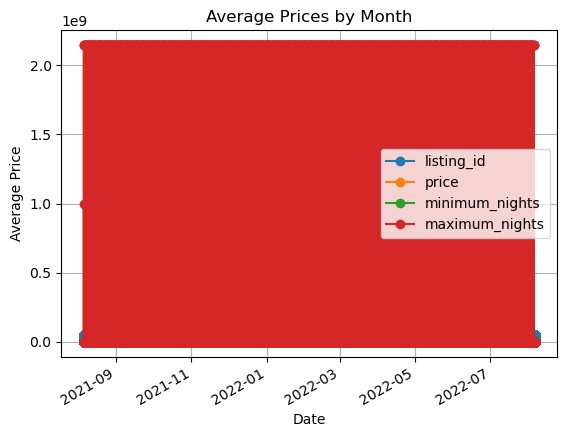

In [42]:
#df_calendar2.plot.line(marker = "o")
#plt.grid()
#plt.xlabel("Date")
#plt.ylabel("Average Price")
#plt.title("Average Prices by Month")
#plt.show()

In [48]:
df_price_property = Airbnb_listings_final_df.groupby('property_type')
df_avgpropertyprice = df_price_property['price'].mean()
df_avgpropertyprice

property_type
Camper/RV                               188.000000
Entire bungalow                         247.939597
Entire condominium (condo)              206.031299
Entire cottage                          165.000000
Entire guest suite                      106.974206
Entire guesthouse                       129.468750
Entire home/apt                         129.000000
Entire loft                             260.955128
Entire place                            152.333333
Entire rental unit                      143.525160
Entire residential home                 230.763242
Entire serviced apartment               384.333333
Entire townhouse                        226.082949
Entire villa                           1037.800000
Floor                                    55.666667
Private room                             51.666667
Private room in barn                    123.000000
Private room in bed and breakfast        95.350000
Private room in bungalow                 54.640000
Private room in c

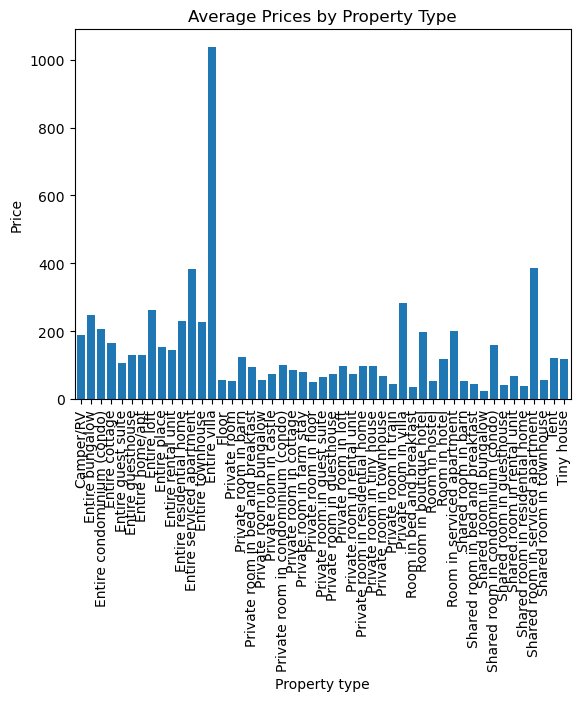

In [49]:
average_price = df_avgpropertyprice.plot(kind="bar", title="Average Prices by Property Type" , width = 0.8)
average_price.set_xlabel("Property type")
average_price.set_ylabel("Price")

plt.show()

In [50]:
#average_roomprice = df_avgroomprice.plot(kind="bar", title="Average Prices by Room Type" , width = 0.8 ,color = 'pink')
#average_price.set_xlabel("Property type")
#average_price.set_ylabel("Price")

#plt.show()

NameError: name 'df_avgroomprice' is not defined

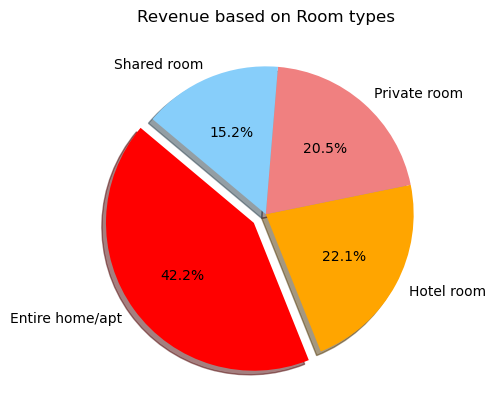

In [52]:
df_price_room = Airbnb_listings_final_df.groupby('room_type')
df_avgroomprice = df_price_room['price'].mean()
df_avgroomprice

labels = ["Entire home/apt", "Hotel room ", "Private room ", "Shared room" ]
colors = ["red", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0)

plt.pie(df_avgroomprice, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title ("Revenue based on Room types")

plt.show()


In [53]:
bnb_corr = Airbnb_listings_final_df.corr()
bnb_corr.unstack().sort_values()

C:\Users\akans\AppData\Local\Temp\ipykernel_6112\3183106448.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bnb_corr = Airbnb_listings_final_df.corr()


id                    number_of_reviews      -0.288964
number_of_reviews     id                     -0.288964
                      host_id                -0.134953
host_id               number_of_reviews      -0.134953
number_of_reviews     latitude               -0.123499
                                                ...   
longitude             longitude               1.000000
latitude              latitude                1.000000
host_id               host_id                 1.000000
number_of_reviews     number_of_reviews       1.000000
review_scores_rating  review_scores_rating    1.000000
Length: 121, dtype: float64

In [55]:
# Checking the corelation between price and no. of bedrooms

price = Airbnb_listings_final_df ['price']
Bedrooms = Airbnb_listings_final_df ['bedrooms']
corr = st.pearsonr(price,price)
corr
#print (f"The correlation betweenprice and No. of Accomodates is {correlation}")

PearsonRResult(statistic=0.9999999999999999, pvalue=0.0)

In [56]:
#plt.scatter(price ,rate)
#plt.xlabel("price")
#plt.ylim(0,5)
#plt.ylabel("No. of Bedrooms")
#plt.title("Co-relation between Price and No. of Bedrooms")
#plt.show()

    
#As we calculated the corealtion between price and no of bedrooms it shows the r value is 0.17 that means there is no relation 
#which is also clear in the scatter plot 

NameError: name 'rate' is not defined

The correlation betweenprice and No. of Accomodates is 0.2


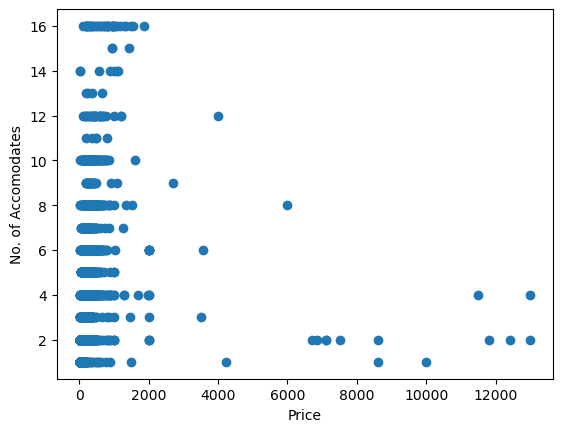

In [58]:
price = Airbnb_listings_final_df ['price']
Accomodates = Airbnb_listings_df ['accommodates']
correlation = st.pearsonr(price , Accomodates)
print (f"The correlation betweenprice and No. of Accomodates is {round(correlation[0],2)}")
plt.scatter(price,Accomodates)
plt.xlabel("Price")
plt.ylabel("No. of Accomodates")
plt.show()
#As we calculated the correlation between price and no of accommodates it shows the r value is 0.2 that means there is no relation 
#which is also clear in the scatter plot 


In [59]:
Airbnb_listings_final_df.describe().price
# As we can see from the table the average price of an airbnb irrespective of the property type is $155

count    10687.000000
mean       155.018059
std        379.602692
min         13.000000
25%         65.000000
50%        101.000000
75%        170.000000
max      13000.000000
Name: price, dtype: float64

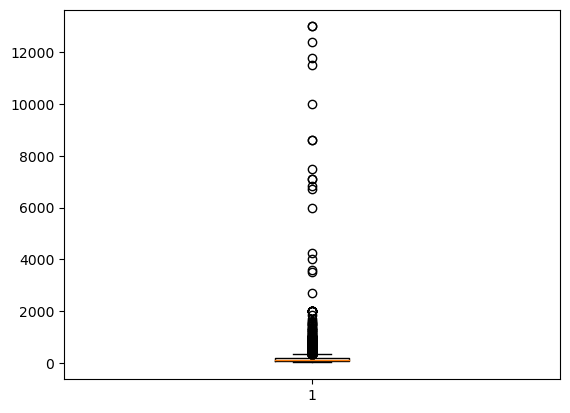

In [60]:
price= Airbnb_listings_final_df ['price']
plt.boxplot(price)
plt.show()
#As mentioned, the mean price is $155 irrespective of the property type but there is a huge variance.
#The box and whisker shows that there are many outliers present in the data.


# BENEFITS OF REVIEWS TO AIRBNB HOSTS

<function matplotlib.pyplot.show(close=None, block=None)>

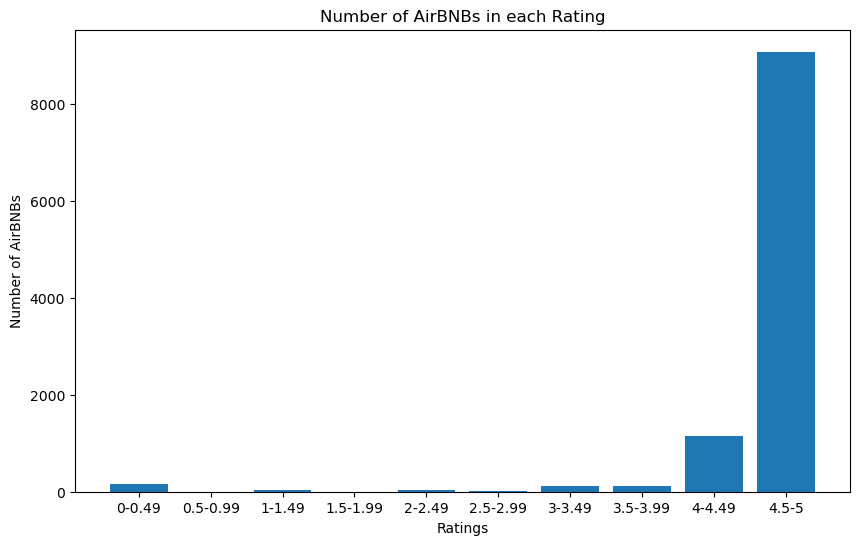

In [20]:
# This graph counts how many of each category of review scores there are
# The bar graph shows that there are an extremely large number of AirBNBs between 4.5 and 5 stars
categories = [0,0,0,0,0,0,0,0,0,0]
xaxis = ['0-0.49', '0.5-0.99', '1-1.49', '1.5-1.99', '2-2.49', '2.5-2.99', '3-3.49', '3.5-3.99', '4-4.49', '4.5-5']
for score in Airbnb_listings_final_df.loc[:,'review_scores_rating']:
    if score < 0.5:
        categories[0]+=1
    elif score < 1:
        categories[1]+=1
    elif score < 1.5:
        categories[2]+=1
    elif score < 2:
        categories[3]+=1
    elif score < 2.5:
        categories[4]+=1
    elif score < 3:
        categories[5]+=1
    elif score < 3.5:
        categories[6]+=1
    elif score < 4:
        categories[7]+=1
    elif score < 4.5:
        categories[8]+=1
    else:
        categories[9]+=1
plt.figure(figsize=(10,6))
plt.bar(xaxis, categories)
plt.xlabel("Ratings")
plt.ylabel("Number of AirBNBs")
plt.title("Number of AirBNBs in each Rating")
plt.show

In [21]:
# As can be seen from the graph above, the majority of AirBNBs are between 4.5 and 5 stars. 
# Next, calculate the mean, median, and standard deviation of the ratings
# The average/mean rating is 4.66
Airbnb_listings_final_df.loc[:,'review_scores_rating'].mean()

4.658776083091607

In [22]:
# The median rating (the rating in the exact middle of the data set) is 4.85
Airbnb_listings_final_df.loc[:,'review_scores_rating'].median()

4.85

In [23]:
# The standard deviation of the data set is 0.71, which shows how the data is clustered around the mean
Airbnb_listings_final_df.loc[:,'review_scores_rating'].std()

0.7107307366159662

In [24]:
# This information further shows that most AirBNBs are within 4.5 and 5 stars, with a spread of 0.71 around the mean of 4.66. 

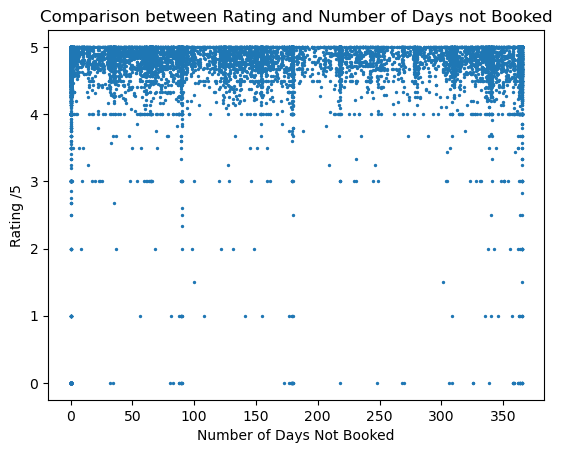

In [25]:
# The graph below compares how many listings were available for the property (how many days it is NOT booked) on the x axis and its review score rating on the y axis
# This graph shows that there is no correlation between high reviews and more days booked
Airbnb_listings_final_df.plot(x = 'availability_365',y = 'review_scores_rating', kind = 'scatter', s = 2)
plt.xlabel("Number of Days Not Booked")
plt.ylabel("Rating /5")
plt.title("Comparison between Rating and Number of Days not Booked")
plt.show()

In [26]:
# The graph shows no correlation between days booked and review score rating
Airbnb_listings_final_df['availability_365'].corr(Airbnb_listings_final_df['review_scores_rating'])
# When the correlation is calculated, it is very close to 0, which shows no correlation (as expected from the graph)
# With such a low correlation, the conclusion can be made that reviews have no correlation on number of bookings an AirBNB receives.

0.016234949179949044

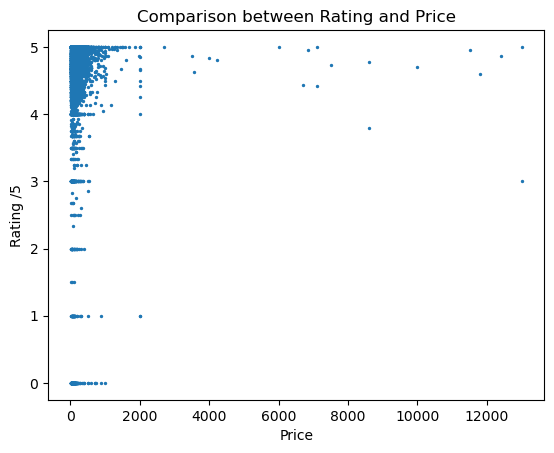

In [27]:
# The graph below compares the price of an AirBNB on the x axis and its review score rating on the y axis
Airbnb_listings_final_df.plot(x = 'price',y = 'review_scores_rating', kind = 'scatter', s = 2)
plt.xlabel("Price")
plt.ylabel("Rating /5")
plt.title("Comparison between Rating and Price")
plt.show()

In [28]:
# In this cell, we double check that there is no correlation between days booked and reviews
Airbnb_listings_final_df['price'].corr(Airbnb_listings_final_df['review_scores_rating'])
# When the correlation is calculated, it is very close to 0, which shows no correlation (as expected from the graph)

0.004597171834099467

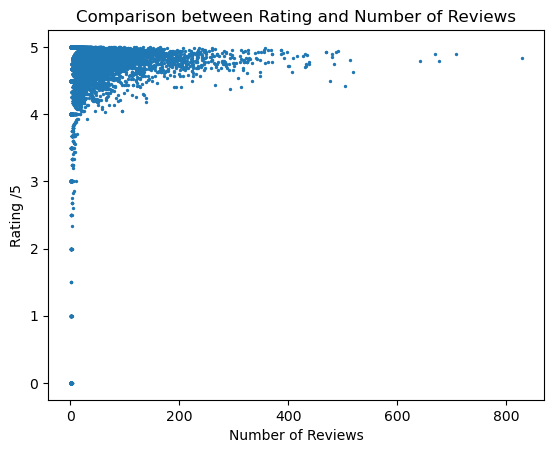

In [61]:
# The graph below compares how many reviews an AirBNB received on the x axis and its review score rating on the y axis
# This graph shows that, while most AirBNBs have fewer than 200 reviews, the ones with more reviews consistently score higher
Airbnb_listings_final_df.plot(x = 'number_of_reviews',y = 'review_scores_rating', kind = 'scatter', s = 2)
plt.xlabel("Number of Reviews")
plt.ylabel("Rating /5")
plt.title("Comparison between Rating and Number of Reviews")
plt.show()

In [30]:
# In this cell, we double check that there is no correlation between days booked and reviews
Airbnb_listings_final_df['number_of_reviews'].corr(Airbnb_listings_final_df['review_scores_rating'])
# When the correlation is calculated, it is very close to 0, which shows no correlation (as expected from the graph)

0.10258166157610459

In [31]:
#Therefore, all these calculations show that, while most AirBNBs have high reviews, the benefit of these reviews to hosts are unclear
#Perhaps this is because so many AirBNBs have such high reviews, so having a high review score does not lead to immediate benefits.
#In conclusion, maintaining high reviews is important but does not make an AirBNB stand out.

In [33]:
Airbnb_listings_final_df

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,room_type,bathrooms_text,bedrooms,beds,amenities,price,availability_365,number_of_reviews,review_scores_rating
0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64617,-79.42451,Entire residential home,10,Entire home/apt,3 baths,5.0,7.0,"[""Smoke alarm"", ""Dryer"", ""Indoor fireplace"", ""...",469.0,0,7,5.00
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,Waterfront Communities-The Island,43.64105,-79.37628,Private room in rental unit,2,Private room,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Elevator"", ""Pool"", ""Gym"", ""He...",94.0,365,169,4.84
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,Briar Hill-Belgravia,43.69602,-79.45468,Private room in residential home,3,Private room,1 shared bath,1.0,1.0,"[""Bed linens"", ""Keypad"", ""Hot water"", ""Extra p...",72.0,365,217,4.75
5,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,Waterfront Communities-The Island,43.64151,-79.37643,Entire rental unit,2,Entire home/apt,1.5 baths,1.0,2.0,"[""Smoke alarm"", ""Elevator"", ""Pool"", ""Gym"", ""Ki...",125.0,365,1,5.00
6,40456,Downtown- King Size Bed and Parking,174063,Denis,South Parkdale,43.63532,-79.44049,Entire residential home,5,Entire home/apt,1 bath,2.0,2.0,"[""Hot water"", ""Coffee maker"", ""Heating"", ""Oven...",100.0,190,113,4.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14934,51285467,1 room/2 bed unit near the lake in Old Toronto,68920217,Jacob,Long Branch,43.59077,-79.53081,Entire rental unit,4,Entire home/apt,1 bath,1.0,2.0,"[""Long term stays allowed""]",165.0,365,1,2.00
14947,51306728,1-Bedroom Condo in the Heart of Downtown Toronto,14248365,Jay,Waterfront Communities-The Island,43.64461,-79.39189,Entire condominium (condo),2,Entire home/apt,1 bath,1.0,0.0,"[""Smoke alarm"", ""Pool"", ""Pool table"", ""Kitchen...",200.0,353,1,5.00
14960,51325342,Cottage feel in the heart of the city,152725249,Aina,Broadview North,43.68493,-79.35119,Private room in residential home,1,Private room,1 shared bath,1.0,1.0,"[""Bed linens"", ""Hot water kettle"", ""Hot water""...",47.0,0,2,5.00
14963,51331254,Cottage in the City - breakfast Included!,244309863,Chamalee,Parkwoods-Donalda,43.76491,-79.32371,Entire guest suite,6,Entire home/apt,1 bath,1.0,2.0,"[""Bed linens"", ""Hot water kettle"", ""Hot water""...",95.0,357,2,5.00


# NUMBER OF LISTINGS IN EACH NEIGHBOURHOOD

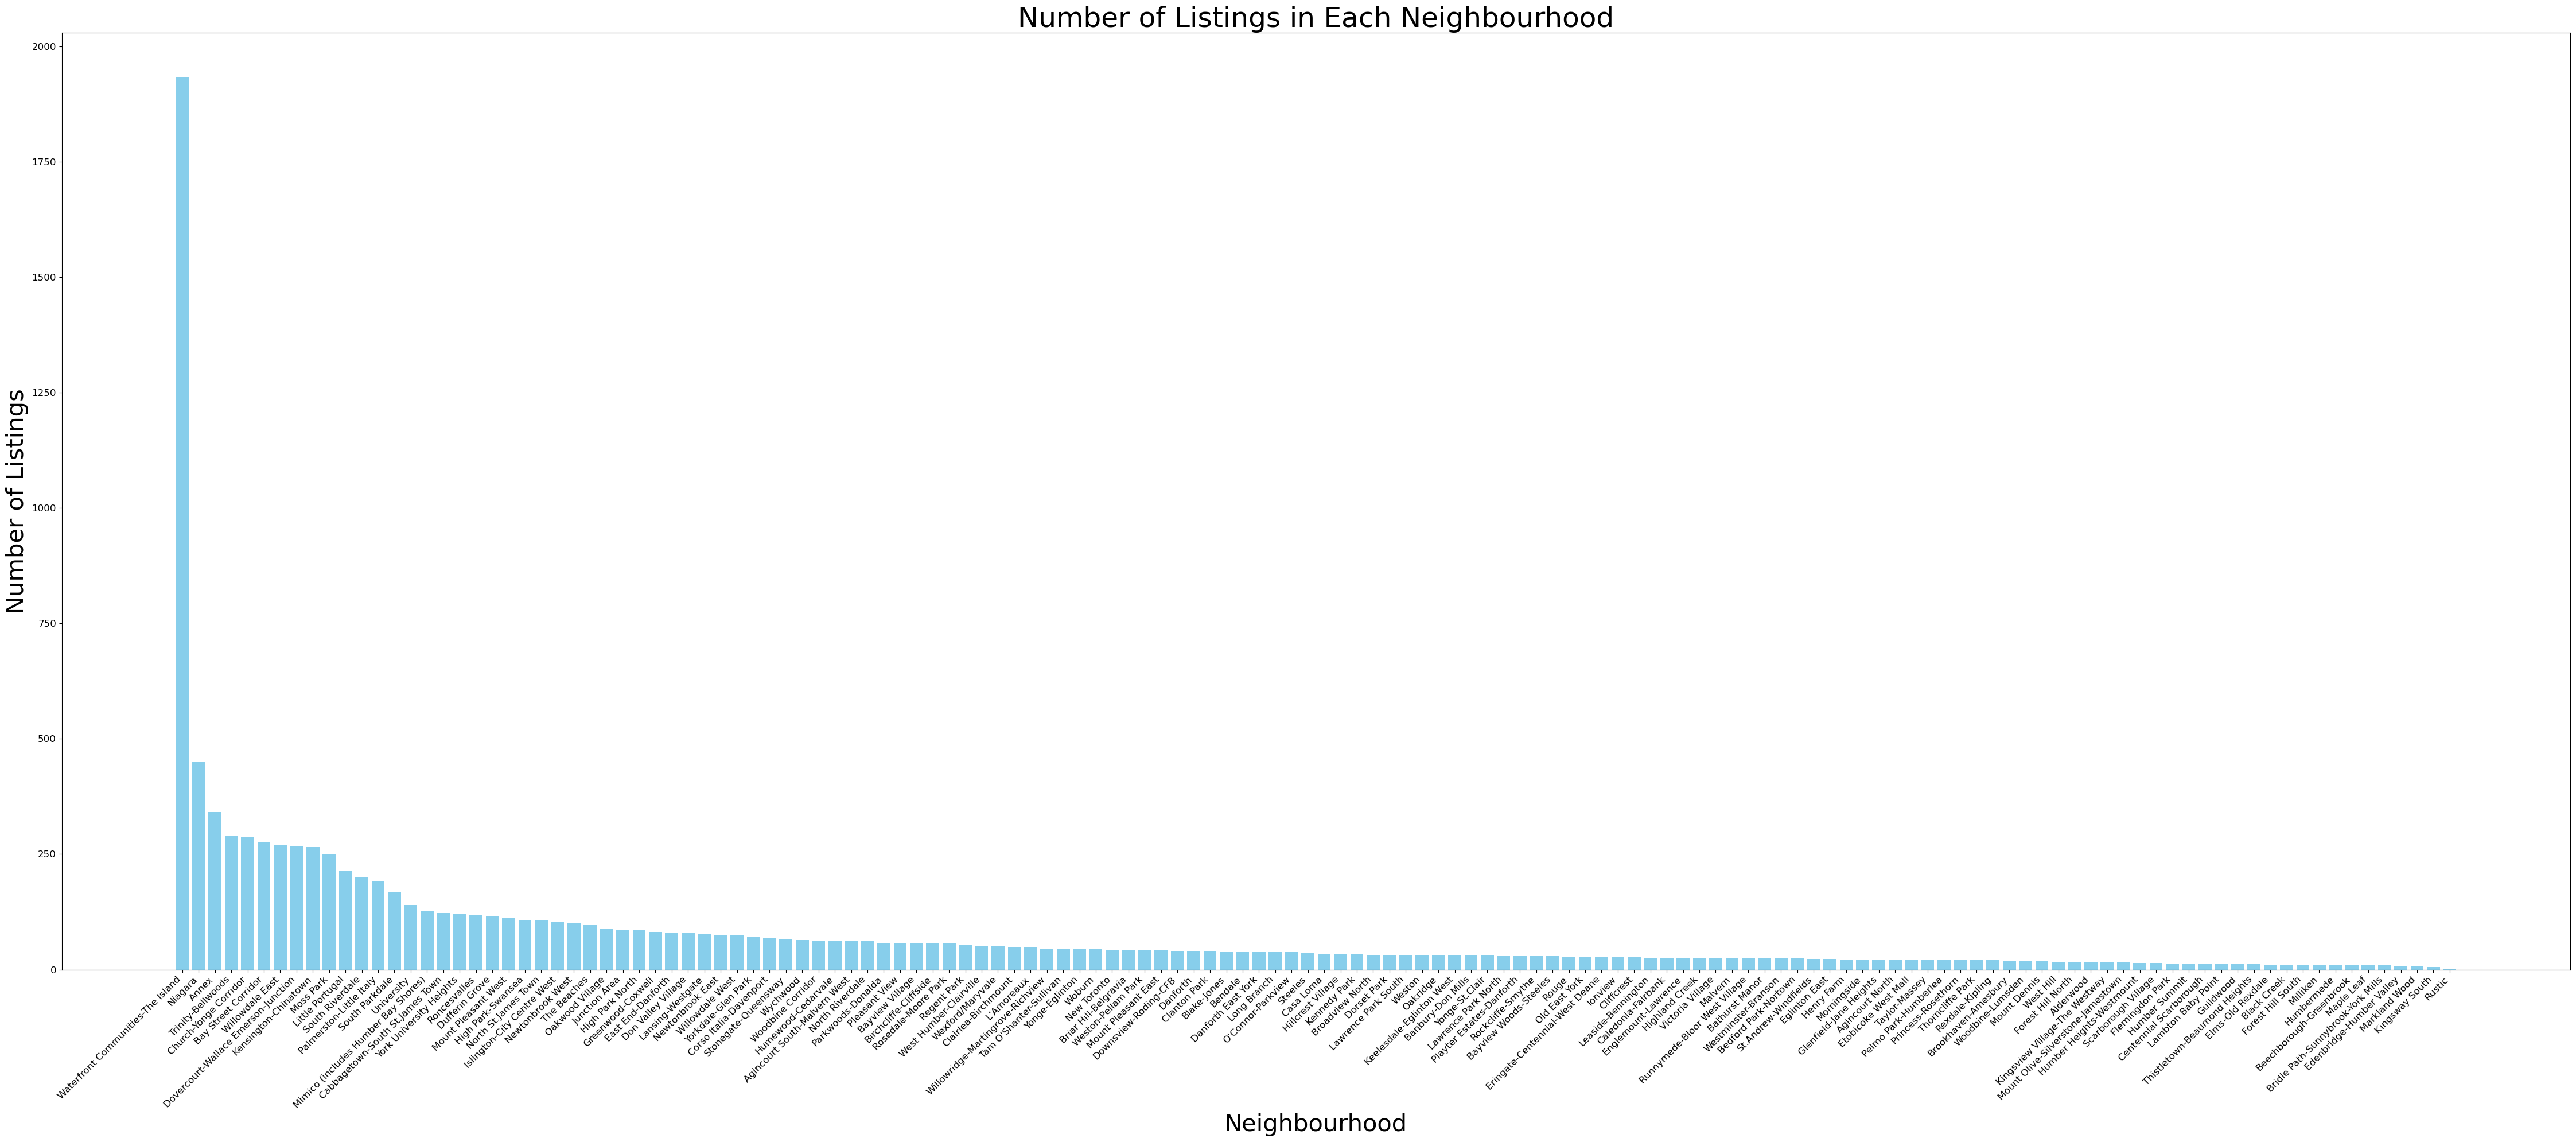

In [36]:
# Group data by neighborhood and count listings
neighborhood_counts = Airbnb_listings_final_df['neighbourhood_cleansed'].value_counts()

# Sort neighborhoods by the number of listings in descending order
neighborhood_counts_sorted = neighborhood_counts.sort_values(ascending=False)

# Create the vertical bar chart

# Adjust figure size for better visualization
plt.figure(figsize=(45, 20))  

plt.bar(neighborhood_counts_sorted.index, neighborhood_counts_sorted.values, color='skyblue')

# Add font size for better readability
plt.xlabel('Neighbourhood', fontsize=30)
plt.ylabel('Number of Listings', fontsize=30)  
plt.title('Number of Listings in Each Neighbourhood', fontsize=35)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set tick label font size for y-axis
plt.yticks(fontsize=12)  

# Adjust layout for better spacing
plt.tight_layout()  
plt.show()



# DESCRIPTION
The vertical bar chart clearly displays the number of listings in each neighborhood in Toronto. The x-axis represents the neighborhoods, and the y-axis represents the number of listings in each neighborhood. The height of each bar corresponds to the number of listings, and the neighborhoods are sorted in descending order from left to right, with the neighborhood having the highest number of listings on the left.

# TOP 10 NEIGHBOURHOODS BY NUMBER OF LISTINGS

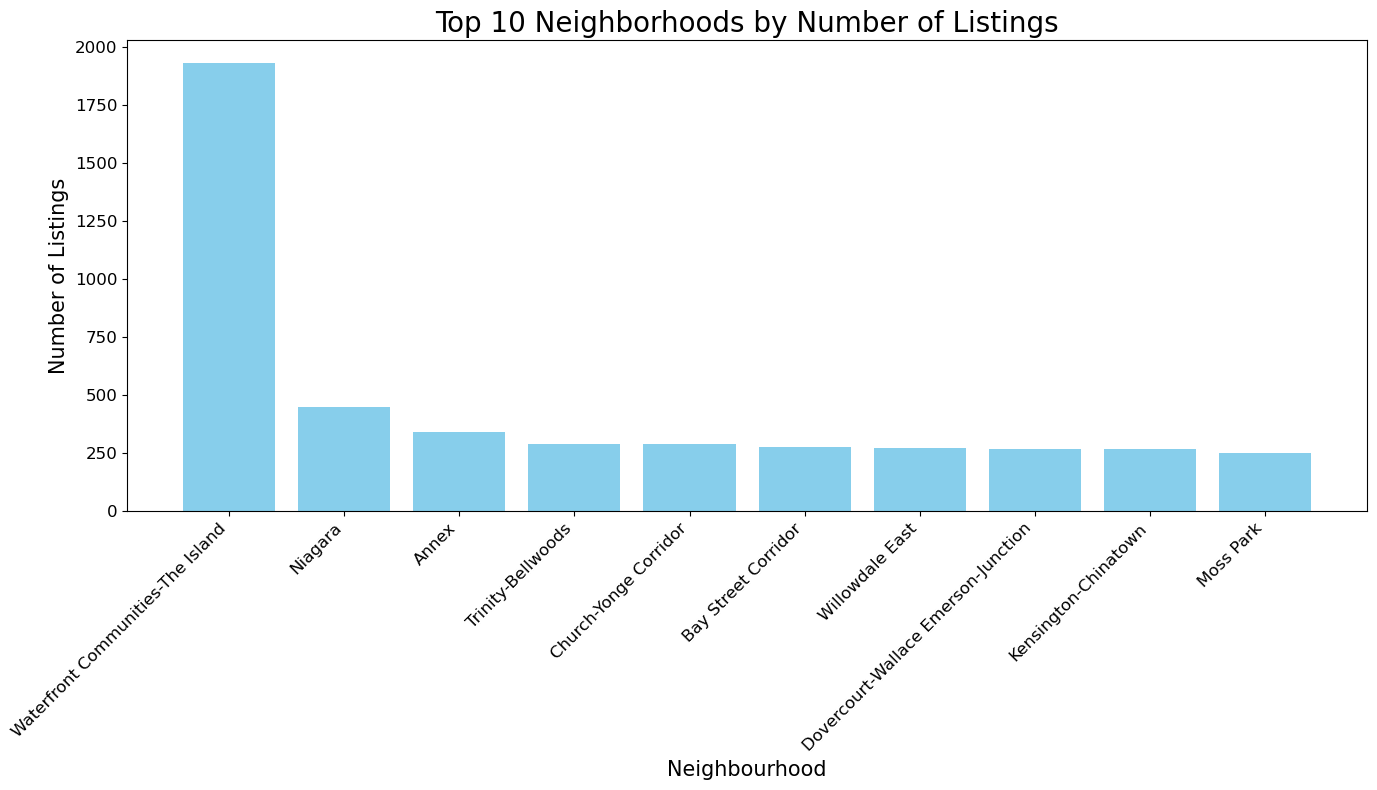

In [37]:
# Zoomed-in version for top 10 neighborhoods
top_n = 10  # Define the number of top neighborhoods to display

# Select top N neighborhoods with the highest number of listings
top_neighborhoods = neighborhood_counts_sorted.head(top_n)

# Create the zoomed-in bar chart
plt.figure(figsize=(14, 8))  
plt.bar(top_neighborhoods.index, top_neighborhoods.values, color='skyblue')
plt.xlabel('Neighbourhood', fontsize=15)  # Add font size for better readability
plt.ylabel('Number of Listings', fontsize=15)  # Add font size for better readability
plt.title(f'Top {top_n} Neighborhoods by Number of Listings', fontsize=20)  # Add font size for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Set tick label font size for y-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# DESCRIPTION
The zoomed-in bar chart allows us to focus on the top 10 neighborhoods in Toronto with the highest number of listings.This visual enables viewers to quickly identify the top neighborhoods for short-term rentals in Toronto. It provides a clear comparison of the number of listings in these neighborhoods, allowing stakeholders to understand the most popular areas for short-term rental business opportunities.

# DISTRIBUTION OF ROOM TYPES

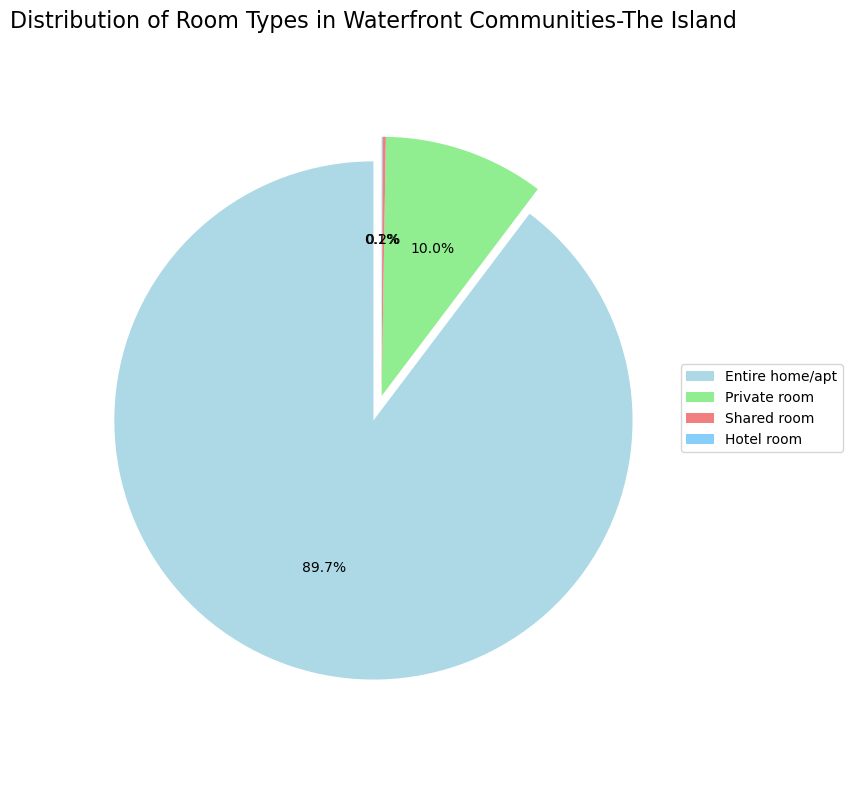

In [39]:
# Get the name of the most popular neighborhood
most_popular_neighborhood = neighborhood_counts_sorted.index[0]

# Filter the DataFrame to include only the most popular neighborhood
most_popular_neighborhood_df = Airbnb_listings_final_df[Airbnb_listings_final_df['neighbourhood_cleansed'] == most_popular_neighborhood]

# Group data by room type and count listings in the most popular neighborhood
room_type_counts = most_popular_neighborhood_df['room_type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.pie(room_type_counts.values, labels=None, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.1, 0, 0, 0))
plt.title(f'Distribution of Room Types in {most_popular_neighborhood}', fontsize=16)

# Add a legend to display room types with corresponding percentages
plt.legend(room_type_counts.index, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.axis('equal')
plt.tight_layout()
plt.show()


# DESCRIPTION
The pie chart provides a visual representation of the distribution of different room types in the most popular neighborhood for short-term rentals in Toronto. Each slice in the pie chart represents a room type (e.g., Entire home/apt, Private room, etc.), and the size of the slice indicates the proportion of listings belonging to that room type in the most popular neighborhood.

# SUMMARY STATISTICS

In [40]:

# Group data by neighborhood and count listings
neighborhood_counts = Airbnb_listings_final_df['neighbourhood_cleansed'].value_counts()

# Get the name of the most popular neighborhood (the one with the highest number of listings)
most_popular_neighborhood = neighborhood_counts.index[0]

# Get the number of listings in the most popular neighborhood
most_popular_neighborhood_listings = neighborhood_counts.iloc[0]

print(f"The most popular neighborhood for short-term rental in Toronto is '{most_popular_neighborhood}' with {most_popular_neighborhood_listings} listings.")


The most popular neighborhood for short-term rental in Toronto is 'Waterfront Communities-The Island' with 1933 listings.
